## Semantic Segmentation

Semantic segmentation, which is a pixel-level labeling for image classification, is an important technique for the scene understanding. Because each pixel is labeled as belonging to a given semantic class. 

Autonomous driving will be one of the revolutionary technologies in the near future in terms of the impact on the lives of people living in industrially developed
countries. An autonomous vehicle must sense its surroundings and act safely to reach a certain target. Such functionality is carried out by using several types of classifiers. 

In a typical task of scene understanding, the classes could be road, street, traffic signs, street markings, cars, pedestrians, sidewalks, trees. 


### In this notebook, we are implementing U-net model which can detect capture the semantic information and differentiate between different objects around in the scene. 

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.1.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Dataset link

https://drive.google.com/file/d/1GT3k4nPHLmU6AbQldYhw0c2rTOxAgNUW

In [3]:
'''
import os
os.chdir('/content/drive/My Drive/AIML Notes/Segmentation/')
path = '.'
'''

"\nimport os\nos.chdir('/content/drive/My Drive/AIML Notes/Segmentation/')\npath = '.'\n"

In [4]:
ls

drive/  sample_data/  testing/  training/


In [5]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/data_semantics.zip','r') as z:
    z.extractall()

In [6]:
pwd

'/content'

In [7]:
project_path = "/content/drive/My Drive/AIML Notes/Segmentation/"

In [8]:
#Image Settings -

IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128


In [9]:
#Getting the image list 
import os
original  = os.listdir('./training/image_2')

In [10]:
print(original)

['000054_10.png', '000122_10.png', '000016_10.png', '000033_10.png', '000084_10.png', '000187_10.png', '000067_10.png', '000047_10.png', '000011_10.png', '000159_10.png', '000075_10.png', '000048_10.png', '000141_10.png', '000099_10.png', '000120_10.png', '000065_10.png', '000189_10.png', '000118_10.png', '000119_10.png', '000023_10.png', '000174_10.png', '000028_10.png', '000183_10.png', '000062_10.png', '000155_10.png', '000083_10.png', '000091_10.png', '000191_10.png', '000136_10.png', '000105_10.png', '000098_10.png', '000005_10.png', '000172_10.png', '000080_10.png', '000110_10.png', '000171_10.png', '000117_10.png', '000127_10.png', '000031_10.png', '000193_10.png', '000058_10.png', '000050_10.png', '000195_10.png', '000148_10.png', '000095_10.png', '000086_10.png', '000089_10.png', '000008_10.png', '000182_10.png', '000072_10.png', '000151_10.png', '000101_10.png', '000017_10.png', '000007_10.png', '000020_10.png', '000079_10.png', '000036_10.png', '000156_10.png', '000043_10.pn

In [11]:
masks  = os.listdir('./training/semantic')

In [12]:
print(masks)

['000054_10.png', '000122_10.png', '000016_10.png', '000033_10.png', '000084_10.png', '000187_10.png', '000067_10.png', '000047_10.png', '000011_10.png', '000159_10.png', '000075_10.png', '000048_10.png', '000141_10.png', '000099_10.png', '000120_10.png', '000065_10.png', '000189_10.png', '000118_10.png', '000119_10.png', '000023_10.png', '000174_10.png', '000028_10.png', '000183_10.png', '000062_10.png', '000155_10.png', '000083_10.png', '000091_10.png', '000191_10.png', '000136_10.png', '000105_10.png', '000098_10.png', '000005_10.png', '000172_10.png', '000080_10.png', '000110_10.png', '000171_10.png', '000117_10.png', '000127_10.png', '000031_10.png', '000193_10.png', '000058_10.png', '000050_10.png', '000195_10.png', '000148_10.png', '000095_10.png', '000086_10.png', '000089_10.png', '000008_10.png', '000182_10.png', '000072_10.png', '000151_10.png', '000101_10.png', '000017_10.png', '000007_10.png', '000020_10.png', '000079_10.png', '000036_10.png', '000156_10.png', '000043_10.pn

In [13]:
#Separating  mask and images 
# masks = []
# original = []
# for filename in mylist:
#     if filename.endswith('.png'):
#         masks.append(filename)
#     if filename.endswith('.jpg'):
#         original.append(filename)

In [14]:
#Sorting
original.sort()
masks.sort()

In [15]:
#Checkout image names
print(original[-1])
print(masks[-1])
print(original[1])
print(masks[1])


000199_10.png
000199_10.png
000001_10.png
000001_10.png


In [16]:
import cv2
import matplotlib.pyplot as plt

In [17]:
#Get the data -  X and y
import numpy as np

y = np.zeros((len(masks), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)

X = np.zeros((len(original), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)

for file in original:
    n = original.index(file)
    path1 = os.path.join('./training/image_2', file)
    #path1 = './images/Abyssinian_34.jpg'
    img = cv2.imread(path1,1)
    try:
#         print(img.shape)
        img = cv2.resize(img, (128,128))
#         print(img.shape)
#         img = img[..., np.newaxis]
        X[n] = img/ 255
        file2 = masks[n]
        #n = masks.index(file)
        path2 = os.path.join('./training/semantic_rgb', file2)
        # Load images
              
        mask = np.array(cv2.imread(path2, 1))
#         print(mask.shape)
#         mask = (mask<12)*1.0
        mask = cv2.resize(mask, (128, 128))
#         mask = mask[:, :, :]
#         mask = mask[..., np.newaxis]
#         print(mask.shape)
#         mask = 1.0*(mask[:,:,0]>12)
        y[n] = mask/255
#         y[n,:,:] = np.squeeze(mask)
#         print(y.shape)
    except Exception as e:
        print(e)
        print(path1)


In [18]:
#Check the data
print(X.shape)
print(y.shape)

(200, 128, 128, 3)
(200, 128, 128, 3)


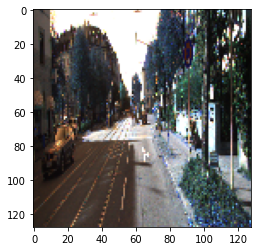

In [19]:
#Check the images
plt.imshow(X[1])

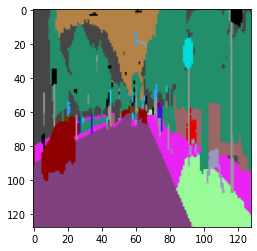

In [20]:
plt.imshow(y[1])

(375, 1242, 3)


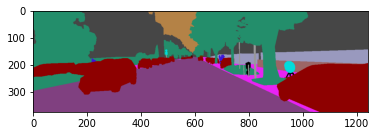

In [21]:
a = './training/semantic_rgb/000000_10.png'
img = cv2.imread(a, 1)
print(img.shape)
plt.imshow(img)

(128, 128, 3)


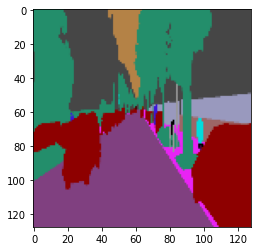

In [22]:
img = cv2.resize(img, (128, 128))
print(img.shape)
# img = img[:,:, :]
plt.imshow(img)

In [24]:
#Install segmentation models. 
#The segmentation_model was written with the following versions of keras and tensorflow, so we need to downgrade the following modules
#After running this code block, comment the whole code block and restart and run the code
!pip install git+https://github.com/qubvel/segmentation_models
!pip install keras==2.3.1
!pip install tensorflow==2.1.0
!pip install keras_applications==1.0.8
!pip install image-classifiers==1.0.0
!pip install efficientnet==1.0.0


'\n!pip install keras==2.3.1\n!pip install tensorflow==2.1.0\n!pip install keras_applications==1.0.8\n!pip install image-classifiers==1.0.0\n!pip install efficientnet==1.0.0\n'

In [1]:
#Import libraries
import segmentation_models
segmentation_models.set_framework('tf.keras')
from segmentation_models import Unet
from segmentation_models.backbones.backbones_factory import Backbones
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [26]:
from sklearn.model_selection import train_test_split

# Split train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=2019)

In [27]:
BACKBONE = 'resnet34'
preprocess_input = Backbones.get_preprocessing(BACKBONE)

In [28]:
x_train = preprocess_input(X_train)
x_val = preprocess_input(X_valid)

In [29]:
x_val.shape

(30, 128, 128, 3)

In [30]:
x_train.shape

(170, 128, 128, 3)

In [31]:
#Build your model 

N = x_train.shape[-1]

base_model = Unet(backbone_name='inceptionv3', encoder_weights='imagenet')

inp = Input(shape=(128, 128, N))
l1 = Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels
out = base_model(l1)
l2 = Conv2D(3, (1, 1))(out)
model = Model(inp, l2, name=base_model.name)
model.summary()

87916544/87910968 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 128, 128, 3)       12        
_________________________________________________________________
model (Model)                multiple                  29933105  
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 128, 128, 3)       6         
Total params: 29,933,123
Trainable params: 29,896,707
Non-trainable params: 36,416
_________________________________________________________________


In [32]:
base_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 multiple             864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma multiple             96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         multiple             0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [34]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [35]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.math.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

In [36]:
# compile model
model.compile('Adam', loss=loss, metrics=[dice_coefficient])

In [37]:
# fit model
model.fit(
    x=x_train,
    y=y_train,
    batch_size=10,    
    epochs=100,
    validation_data=(x_val, y_valid),
)

Train on 170 samples, validate on 30 samples
Epoch 1/100
170/170 [==============================] - 20s 119ms/sample - loss: nan - dice_coefficient: -0.7915 - val_loss: nan - val_dice_coefficient: -0.5358
Epoch 2/100
170/170 [==============================] - 2s 9ms/sample - loss: nan - dice_coefficient: -1.8263 - val_loss: nan - val_dice_coefficient: -3.2134
Epoch 3/100
170/170 [==============================] - 2s 9ms/sample - loss: nan - dice_coefficient: -4.5219 - val_loss: nan - val_dice_coefficient: -4.5390
Epoch 4/100
170/170 [==============================] - 2s 9ms/sample - loss: nan - dice_coefficient: -137.9533 - val_loss: nan - val_dice_coefficient: 64.7456
Epoch 5/100
170/170 [==============================] - 2s 9ms/sample - loss: nan - dice_coefficient: 28.7212 - val_loss: nan - val_dice_coefficient: 8.1758
Epoch 6/100
170/170 [==============================] - 2s 9ms/sample - loss: nan - dice_coefficient: -50.8828 - val_loss: nan - val_dice_coefficient: -37.5903
Epoch 7

In [38]:
model.evaluate(x_val, y_valid, verbose=1)

30/30 [==============================] - 3s 101ms/sample - loss: 2.7288 - dice_coefficient: 7.2216


[2.7287700176239014, 7.2215586]

In [39]:
# Predict on train, val and test
preds_train = model.predict(x_train, verbose=1)
preds_val = model.predict(x_val, verbose=1)

import numpy as np

# Threshold predictions
# preds_train_t = (preds_train > 0.5).astype(np.uint8)
# preds_val_t = (preds_val > 0.5).astype(np.uint8)

30/30 [==============================] - 0s 2ms/sample


In [40]:
preds_train[0].shape

(128, 128, 3)

In [41]:
#Save weights
from tensorflow.keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [42]:
import matplotlib.pyplot as plt

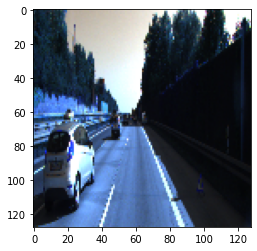

In [45]:
plt.imshow(x_train[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


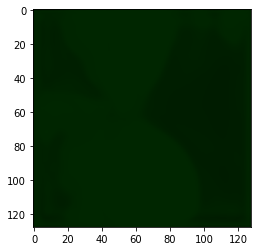

In [47]:
plt.imshow(preds_train[3])